# Descrição do Problema


A academia enfrentava um cenário financeiro onde, apesar de uma receita mensal média de 30.000, os custos operacionais não ultrapassavam 20.000. No entanto, o sócio não recebia um salário fixo, e as contas eram frequentemente pagas com atraso, resultando em falta de sobra de caixa ao final de cada mês. Esse gerenciamento inadequado das finanças comprometia a estabilidade financeira da academia e limitava sua capacidade de investir em melhorias e expandir o número de alunos.

O código desenvolvido tem como objetivo extrair informações dos sistemas de registro de pagamento, revisar o histórico de contas pagas desde 2021, analisar o crescimento de novos alunos e o crescimento da receita, e comparar receitas e custos. Esta análise busca entender a performance financeira da academia e otimizar a gestão de caixa.


#   Importações




In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
!pip install openpyxl


In [ ]:
!pip install xlrd==1.2.0

In [ ]:
from openpyxl import load_workbook

# Análise Matrículas

In [ ]:
df = pd.read_csv('matriculas.csv', sep=';')

df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Codigo,Nome-Completo,Plano,Periodicidade,Inicio,Fim,Valor,Valor-Cobranca
0,1029,Fabricio Lopes,Plano Vip Vitalicio,Mensal,05/01/2021,NaN,0,0
1,1136,Yussef Alli Armad Junior,Plano Vip Vitalicio,Mensal,23/02/2021,NaN,0,0
2,98,Daniela Labos,Alunos do Weslei,Mensal,03/03/2021,NaN,0,0
3,252,Francielle Corte de Souza,Plano Individual,Mensal,06/05/2021,NaN,100,100
4,1194,Micheli Priscila Monteiro Batista,Plano Individual,Mensal,10/05/2021,NaN,100,100


In [ ]:
df['Inicio'] = pd.to_datetime(df['Inicio'], format='%d/%m/%Y')
df['AnoMes'] = df['Inicio'].dt.to_period('M')
matriculas_por_mes = df.groupby('AnoMes').size().reset_index(name='Total_Matriculas')
print(matriculas_por_mes)

     AnoMes  Total_Matriculas
0   2021-01                 1
1   2021-02                 1
2   2021-03                 1
3   2021-05                 3
4   2021-08                 1
5   2021-11                 1
6   2022-01                 6
7   2022-02                 8
8   2022-03                 4
9   2022-04                 3
10  2022-05                 6
11  2022-06                 4
12  2022-07                 2
13  2022-08                 8
14  2022-09                 4
15  2022-10                12
16  2022-11                 8
17  2022-12                 5
18  2023-01                24
19  2023-02                20
20  2023-03                18
21  2023-04                27
22  2023-05                28
23  2023-06                28
24  2023-07                39
25  2023-08                46
26  2023-09                47
27  2023-10                64
28  2023-11                56
29  2023-12                49
30  2024-01               126
31  2024-02                68
32  2024-0

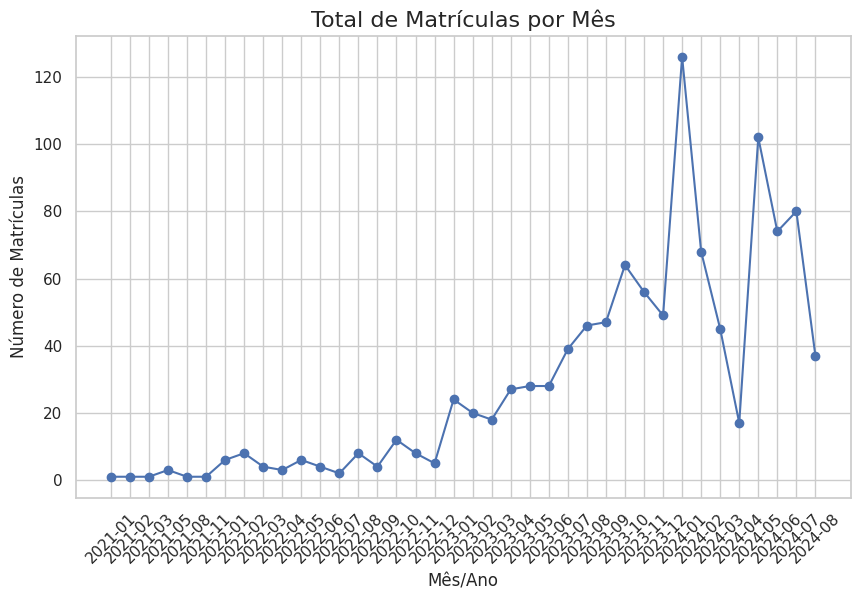

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(matriculas_por_mes['AnoMes'].astype(str), matriculas_por_mes['Total_Matriculas'], marker='o')
plt.title('Total de Matrículas por Mês', fontsize=16)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Número de Matrículas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


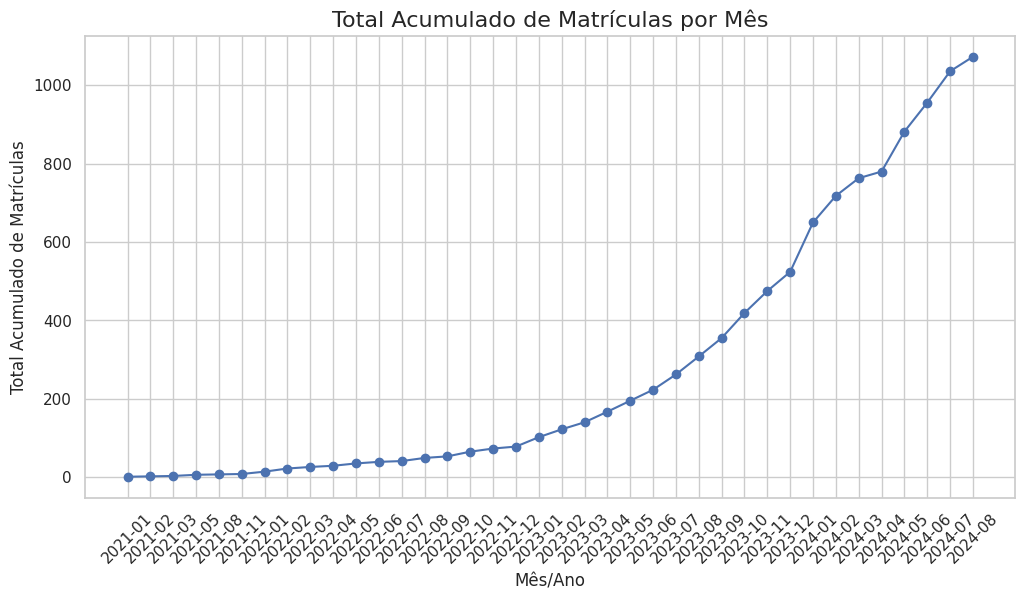

In [ ]:
import matplotlib.pyplot as plt
matriculas_por_mes['Total_Acumulado'] = matriculas_por_mes['Total_Matriculas'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(matriculas_por_mes['AnoMes'].astype(str), matriculas_por_mes['Total_Acumulado'], marker='o', color='b')
plt.title('Total Acumulado de Matrículas por Mês', fontsize=16)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Total Acumulado de Matrículas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
matriculas_ordenadas = matriculas_por_mes.sort_values(by='Total_Matriculas', ascending=False)
matriculas_ordenadas = matriculas_ordenadas.reset_index(drop=True)
top_5_selecionado = matriculas_ordenadas.head(5)[['AnoMes', 'Total_Matriculas']]
print("Top 5 Inscrições:")
print(top_5_selecionado.to_string(index=False))

Top 5 Inscrições:
 AnoMes  Total_Matriculas
2024-01               126
2024-05               102
2024-07                80
2024-06                74
2024-02                68


Necessário identificar quais foram o diferenciais nesses meses para ter esse Top 5 e replicar para estratégia de marketing


# Insights Matrículas



 1. Tendências Gerais:

* **Crescimento Acumulado:** O número total de matrículas aumentou significativamente ao longo do tempo. Em janeiro de 2021, havia apenas 1 matrícula, e em agosto de 2024, há 37 matrículas, com um pico notável em janeiro de 2024 com 126 matrículas.

* **Tendência de Crescimento:** A partir dos dados, há uma tendência geral de crescimento no número de matrículas, com variações mensais.

2. Variações Mensais:

* **Picos de Crescimento:** Em alguns meses, como janeiro de 2022, há um aumento significativo no número de matrículas (+500% em relação ao mês anterior), e em maio de 2024 (+500% também).


3. Análise de Taxa de Crescimento:

* **Picos de Crescimento:** A taxa de crescimento é extremamente alta em alguns meses, sugerindo eventos ou estratégias que causaram um grande aumento nas matrículas.

* **Quedas Significativas:** As quedas acentuadas na taxa de crescimento podem indicar períodos de baixa ou dificuldades.

4. Insights de Longo Prazo:

* **Crescimento Sustentado:** Embora haja variações mensais, o crescimento geral é positivo, especialmente considerando o número de matrículas crescendo de forma mais significativa em 2024.
* **Planejamento:** Para otimizar as matrículas, seria interessante investigar os fatores que contribuem para os meses de crescimento acelerado e os que causam quedas, ajustando estratégias conforme necessário.

# Receita


In [ ]:
df_financeiro = pd.read_csv('financeiro até julho.csv', sep=';')

df_financeiro.head()

,Transacao,Descricao,Valor,Unnamed: 3
0,04/01/2021 08:07,Dinheiro,70,NaN
1,04/01/2021 09:08,Máquina,80,NaN
2,04/01/2021 09:23,Dinheiro,80,NaN
3,04/01/2021 09:28,Máquina,80,NaN
4,04/01/2021 10:34,Máquina,70,NaN


In [1]:
df_financeiro.columns = df_financeiro.columns.str.strip()
df_financeiro['Valor'] = df_financeiro['Valor'].astype(str).str.strip()
def converter_valor(valor):
    try:
        if ',' in valor:
            return float(valor.replace('.', '').replace(',', '.'))
        elif '.' in valor:
            return float(valor.replace(',', ''))
        else:
            return float(valor)
    except ValueError:
        return 0.0  # Se falhar, retornar 0.0 para evitar erro
df_financeiro['Valor'] = df_financeiro['Valor'].apply(converter_valor)
df_financeiro['Transacao'] = pd.to_datetime(df_financeiro['Transacao'], format='%d/%m/%Y %H:%M', errors='coerce')
print(df_financeiro[df_financeiro['Transacao'].isna()])

NameError: name 'df_financeiro' is not defined

In [ ]:
df_financeiro['AnoMes'] = df_financeiro['Transacao'].dt.to_period('M')
pagamentos_por_mes = df_financeiro.groupby('AnoMes')['Valor'].sum().reset_index()
print(pagamentos_por_mes.head(50))

     AnoMes     Valor
0   2021-01  11780.00
1   2021-02  11592.00
2   2021-03   1660.00
3   2021-04   3189.00
4   2021-05   8668.00
5   2021-06   8684.00
6   2021-07  12306.00
7   2021-08  15654.00
8   2021-09  17092.00
9   2021-10  15898.00
10  2021-11  16130.00
11  2021-12  10205.00
12  2022-01  17930.00
13  2022-02  15365.00
14  2022-03  16926.00
15  2022-04  18713.00
16  2022-05  19672.00
17  2022-06  19685.00
18  2022-07  23840.00
19  2022-08  22820.00
20  2022-09  21825.00
21  2022-10  24065.00
22  2022-11  21591.00
23  2022-12  17905.00
24  2023-01  29455.00
25  2023-02  24940.00
26  2023-03  28195.00
27  2023-04  24485.00
28  2023-05  27345.00
29  2023-06  27581.00
30  2023-07  30068.00
31  2023-08  28777.00
32  2023-09  30923.00
33  2023-10  33437.00
34  2023-11  33055.00
35  2023-12  27480.00
36  2024-01  33955.00
37  2024-02  30136.00
38  2024-03  22246.22
39  2024-04  29884.13
40  2024-05  38128.48
41  2024-06  30004.00
42  2024-07  34125.00


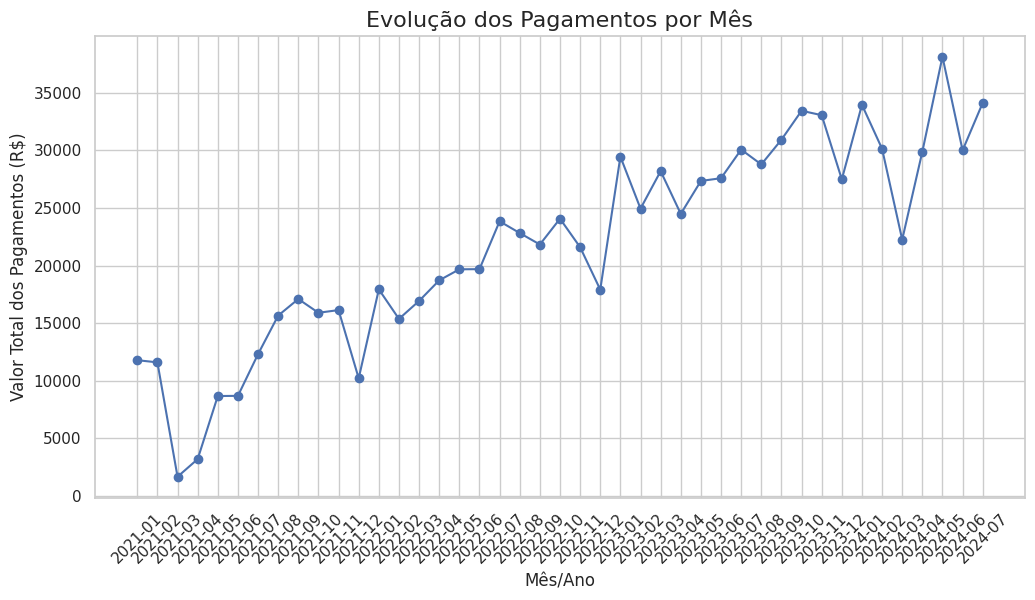

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pagamentos_por_mes['AnoMes'].astype(str), pagamentos_por_mes['Valor'], marker='o', color='b')
plt.title('Evolução dos Pagamentos por Mês', fontsize=16)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Valor Total dos Pagamentos (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


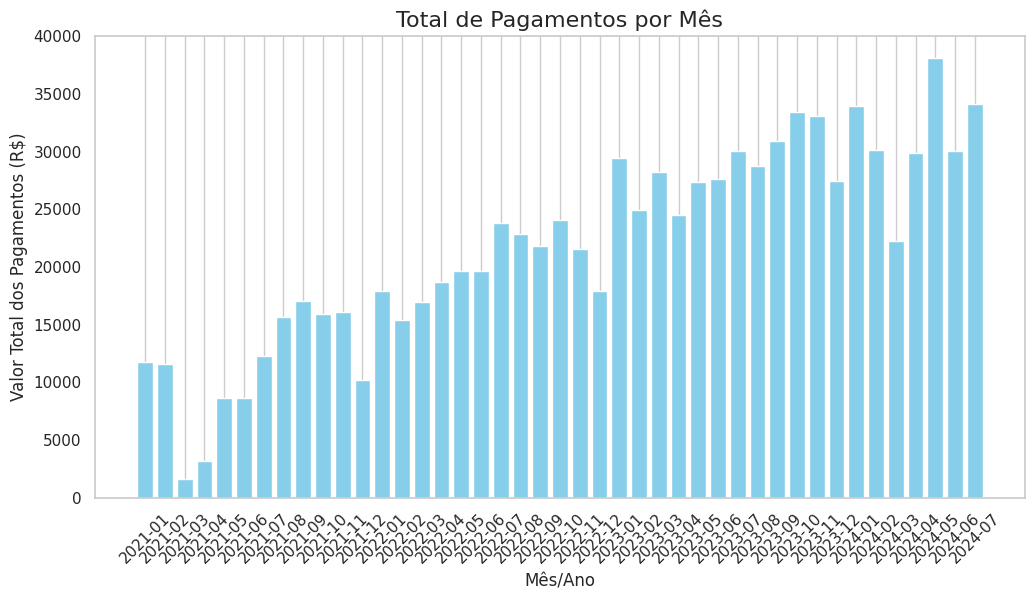

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(pagamentos_por_mes['AnoMes'].astype(str), pagamentos_por_mes['Valor'], color='skyblue')
plt.title('Total de Pagamentos por Mês', fontsize=16)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Valor Total dos Pagamentos (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



# Despesas - Análise sem Pró-labore


In [ ]:
df_custos = pd.read_csv('custos mensais - Sem ProLabore.csv', sep=';')
df_custos['Total Gasto'] = df_custos['Total Gasto'].round(2)
df_custos.head(50)

,Mês,Ano,Total Gasto
0,Janeiro,2021,12381.16
1,Fevereiro,2021,12516.71
2,Março,2021,12800.16
3,Abril,2021,12664.90
4,Maio,2021,12610.10
5,Junho,2021,12389.97
6,Julho,2021,12478.74
7,Agosto,2021,12622.59
8,Setembro,2021,12985.13
9,Outubro,2021,13312.20


In [ ]:
meses_para_numero = {
    'Janeiro': '01', 'Fevereiro': '02', 'Março': '03', 'Abril': '04',
    'Maio': '05', 'Junho': '06', 'Julho': '07', 'Agosto': '08',
    'Setembro': '09', 'Outubro': '10', 'Novembro': '11', 'Dezembro': '12'
}
df_custos['AnoMes'] = df_custos['Ano'].astype(str) + '-' + df_custos['Mês'].map(meses_para_numero)
df_custos_formatado = df_custos[['AnoMes', 'Total Gasto']].rename(columns={'Total Gasto': 'Total_Custo'})
print(df_custos_formatado.head(50))

     AnoMes  Total_Custo
0   2021-01     12381.16
1   2021-02     12516.71
2   2021-03     12800.16
3   2021-04     12664.90
4   2021-05     12610.10
5   2021-06     12389.97
6   2021-07     12478.74
7   2021-08     12622.59
8   2021-09     12985.13
9   2021-10     13312.20
10  2021-11     12941.99
11  2021-12     17247.00
12  2022-01     11803.65
13  2022-02     12236.43
14  2022-03     13705.66
15  2022-04     13699.86
16  2022-05     13818.03
17  2022-06     12880.30
18  2022-07     12998.78
19  2022-08     14327.23
20  2022-09     13282.61
21  2022-10     13500.93
22  2022-11     15144.49
23  2022-12     19990.92
24  2023-01     16152.84
25  2023-02     16569.69
26  2023-03     16712.56
27  2023-04     16605.72
28  2023-05     22323.87
29  2023-06     16948.89
30  2023-07     18067.78
31  2023-08     19638.69
32  2023-09     17329.23
33  2023-10     20014.21
34  2023-11     18690.65
35  2023-12     25797.60
36  2024-01     20898.36
37  2024-02     20423.39
38  2024-03     18896.73


In [ ]:
pagamentos_por_mes['AnoMes'] = pagamentos_por_mes['AnoMes'].astype(str)
df_concatenado = pd.merge(pagamentos_por_mes, df_custos_formatado, on='AnoMes', how='inner')
print(df_concatenado.head(50))


     AnoMes     Valor  Total_Custo
0   2021-01  11780.00     12381.16
1   2021-02  11592.00     12516.71
2   2021-03   1660.00     12800.16
3   2021-04   3189.00     12664.90
4   2021-05   8668.00     12610.10
5   2021-06   8684.00     12389.97
6   2021-07  12306.00     12478.74
7   2021-08  15654.00     12622.59
8   2021-09  17092.00     12985.13
9   2021-10  15898.00     13312.20
10  2021-11  16130.00     12941.99
11  2021-12  10205.00     17247.00
12  2022-01  17930.00     11803.65
13  2022-02  15365.00     12236.43
14  2022-03  16926.00     13705.66
15  2022-04  18713.00     13699.86
16  2022-05  19672.00     13818.03
17  2022-06  19685.00     12880.30
18  2022-07  23840.00     12998.78
19  2022-08  22820.00     14327.23
20  2022-09  21825.00     13282.61
21  2022-10  24065.00     13500.93
22  2022-11  21591.00     15144.49
23  2022-12  17905.00     19990.92
24  2023-01  29455.00     16152.84
25  2023-02  24940.00     16569.69
26  2023-03  28195.00     16712.56
27  2023-04  24485.0

#Relaçao Despesas x Custos (Sem Pró-labore)

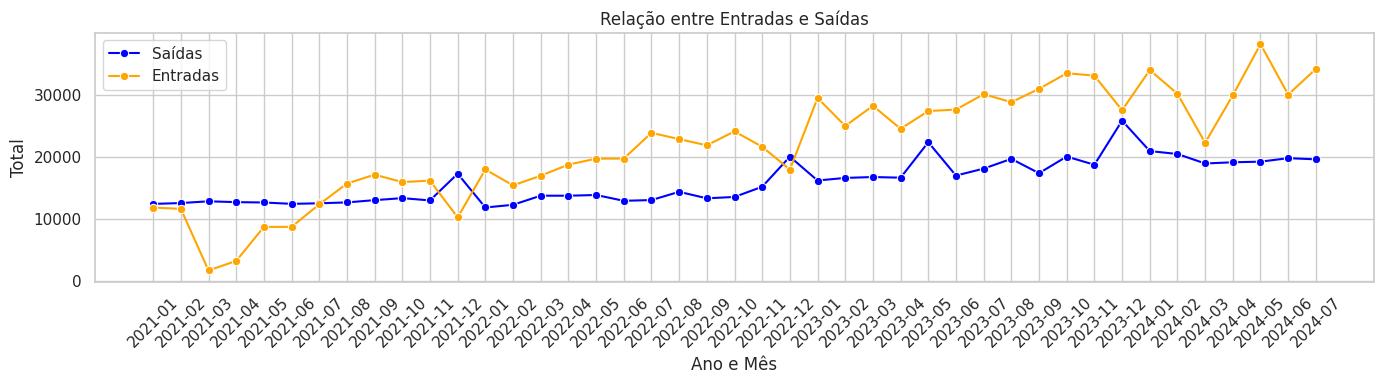

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 4))
sns.lineplot(data=df_concatenado, x='AnoMes', y='Total_Custo', marker='o', ax=ax, label='Saídas', color='blue')
sns.lineplot(data=df_concatenado, x='AnoMes', y='Valor', marker='o', ax=ax, label='Entradas', color='orange')
ax.set_title('Relação entre Entradas e Saídas')
ax.set_xlabel('Ano e Mês')
ax.set_ylabel('Total')
ax.legend()
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()




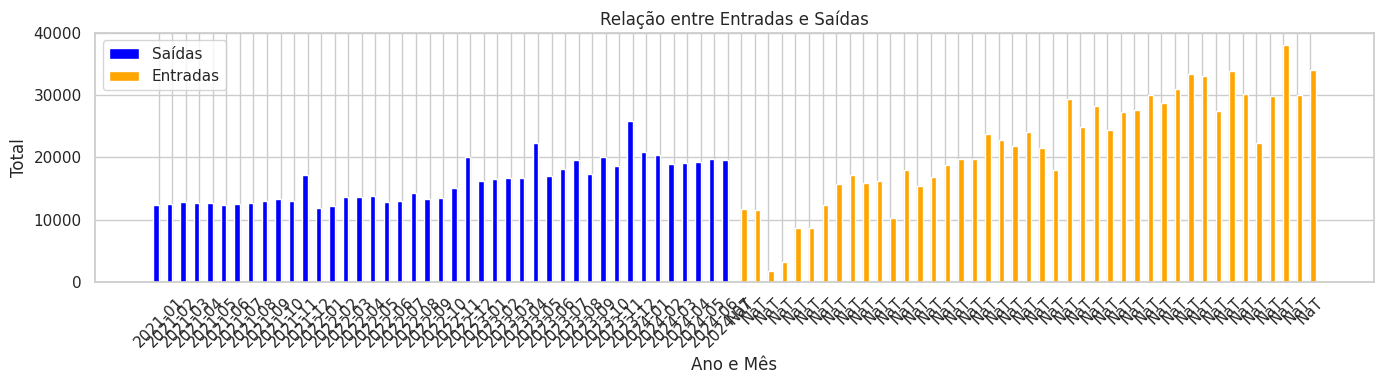

In [ ]:
import matplotlib.pyplot as plt

# Configurar o estilo do gráfico
plt.figure(figsize=(14, 4))

# Criar o gráfico de barras
bar_width = 0.4  # Largura das barras
x = range(len(df_concatenado))  # Posições das barras no eixo x

# Adicionar as barras para Total_Custo
plt.bar(x, df_concatenado['Total_Custo'], width=bar_width, label='Saídas', color='blue', align='center')

# Adicionar as barras para Valor, deslocadas em relação às barras de Total_Custo
plt.bar([i + bar_width for i in x], df_concatenado['Valor'], width=bar_width, label='Entradas', color='orange', align='center')

# Configurações do gráfico
plt.title('Relação entre Entradas e Saídas')
plt.xlabel('Ano e Mês')
plt.ylabel('Total')
plt.xticks([i + bar_width / 2 for i in x], df_concatenado['AnoMes'], rotation=45)
plt.legend()
plt.tight_layout()

# Exibir o gráfico
plt.show()


# Despesas - Análise com Pró-labore


In [ ]:
df_custos_com_pl = pd.read_csv('custos mensais - Com ProLabore.csv', sep=';')
df_custos_com_pl['Total Gasto'] = df_custos_com_pl['Total Gasto'].round(2)
df_custos_com_pl.head(50)

,Mês,Ano,Total Gasto
0,Janeiro,2021,19381.16
1,Fevereiro,2021,19516.71
2,Março,2021,19800.16
3,Abril,2021,19664.90
4,Maio,2021,19610.10
5,Junho,2021,19389.97
6,Julho,2021,19478.74
7,Agosto,2021,19622.59
8,Setembro,2021,19985.13
9,Outubro,2021,20312.20


In [ ]:
meses_para_numero_2 = {
    'Janeiro': '01', 'Fevereiro': '02', 'Março': '03', 'Abril': '04',
    'Maio': '05', 'Junho': '06', 'Julho': '07', 'Agosto': '08',
    'Setembro': '09', 'Outubro': '10', 'Novembro': '11', 'Dezembro': '12'
}
df_custos_com_pl['AnoMes'] = df_custos_com_pl['Ano'].astype(str) + '-' + df_custos_com_pl['Mês'].map(meses_para_numero_2)
df_custos_2_formatado = df_custos_com_pl[['AnoMes', 'Total Gasto']].rename(columns={'Total Gasto': 'Total_Custo'})
df_custos_2_formatado.head(50)

,AnoMes,Total_Custo
0,2021-01,19381.16
1,2021-02,19516.71
2,2021-03,19800.16
3,2021-04,19664.90
4,2021-05,19610.10
5,2021-06,19389.97
6,2021-07,19478.74
7,2021-08,19622.59
8,2021-09,19985.13
9,2021-10,20312.20


#Relaçao Despesas x Custos (Com Pró-labore)

In [ ]:
df_custos_2_formatado['AnoMes'] = df_custos_2_formatado['AnoMes'].astype(str).str[:7]
pagamentos_por_mes['AnoMes'] = pd.to_datetime(pagamentos_por_mes['AnoMes'], format='%Y-%m', errors='coerce').dt.to_period('M').astype(str)
df_concatenado_2 = pd.merge(df_custos_2_formatado, pagamentos_por_mes, on='AnoMes', how='outer')
df_concatenado_2.head(50)


,AnoMes,Total_Custo,Valor
0,2021-01,19381.16,11780.00
1,2021-02,19516.71,11592.00
2,2021-03,19800.16,1660.00
3,2021-04,19664.90,3189.00
4,2021-05,19610.10,8668.00
5,2021-06,19389.97,8684.00
6,2021-07,19478.74,12306.00
7,2021-08,19622.59,15654.00
8,2021-09,19985.13,17092.00
9,2021-10,20312.20,15898.00


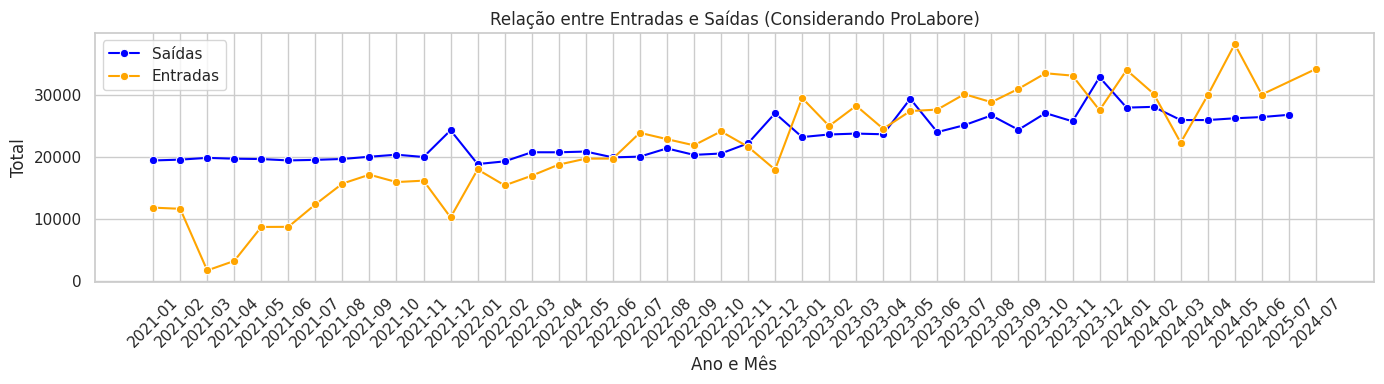

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 4))
sns.lineplot(data=df_concatenado_2, x='AnoMes', y='Total_Custo', marker='o', ax=ax, label='Saídas', color='blue')
sns.lineplot(data=df_concatenado_2, x='AnoMes', y='Valor', marker='o', ax=ax, label='Entradas', color='orange')
ax.set_title('Relação entre Entradas e Saídas (Considerando ProLabore)')
ax.set_xlabel('Ano e Mês')
ax.set_ylabel('Total')
ax.legend()
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

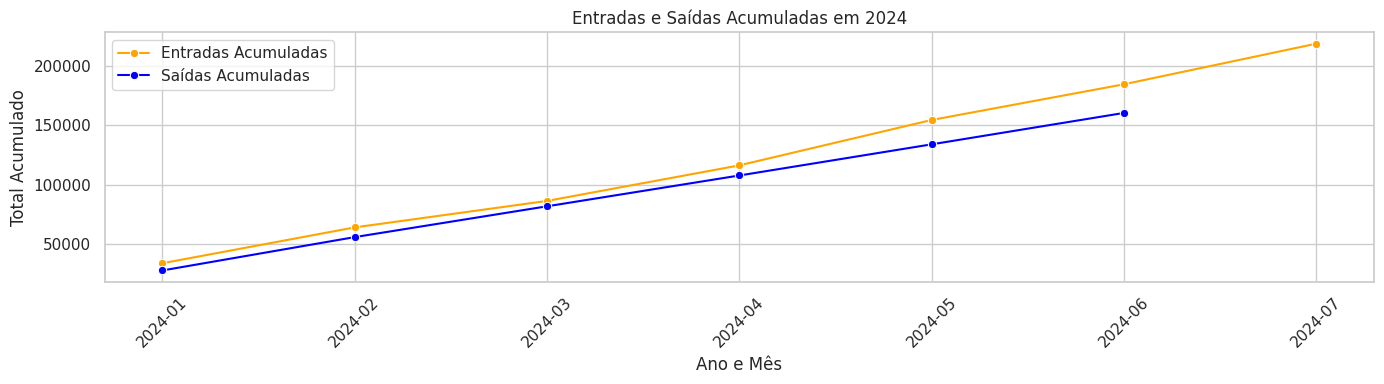

In [ ]:
df_2024 = df_concatenado_2[df_concatenado_2['AnoMes'].str.startswith('2024')].copy()
df_2024.loc[:, 'Entradas_Acumuladas'] = df_2024['Valor'].cumsum()
df_2024.loc[:, 'Saidas_Acumuladas'] = df_2024['Total_Custo'].cumsum()
fig, ax = plt.subplots(figsize=(14, 4))
sns.lineplot(data=df_2024, x='AnoMes', y='Entradas_Acumuladas', marker='o', ax=ax, label='Entradas Acumuladas', color='orange')
sns.lineplot(data=df_2024, x='AnoMes', y='Saidas_Acumuladas', marker='o', ax=ax, label='Saídas Acumuladas', color='blue')
ax.set_title('Entradas e Saídas Acumuladas em 2024')
ax.set_xlabel('Ano e Mês')
ax.set_ylabel('Total Acumulado')
ax.legend()
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


# Organização do Fluxo de Caixa


In [ ]:
df_financeiro = pd.read_csv('financeiro até julho.csv', sep=';')
df_financeiro['Transacao'] = pd.to_datetime(df_financeiro['Transacao'], format='%d/%m/%Y %H:%M')
df_financeiro['Valor'] = pd.to_numeric(df_financeiro['Valor'], errors='coerce')
df_financeiro['Dia'] = df_financeiro['Transacao'].dt.day
df_financeiro['Faixa_Dias'] = pd.cut(df_financeiro['Dia'], bins=[0, 10, 20, 31], labels=['1-10', '11-20', '21-último'])
df_financeiro['Ano_Mes'] = df_financeiro['Transacao'].dt.to_period('M')
df_agrupado = df_financeiro.groupby(['Ano_Mes', 'Faixa_Dias'])['Valor'].sum().reset_index()
print(df_agrupado)

     Ano_Mes Faixa_Dias  Valor
0    2021-01       1-10   4035
1    2021-01      11-20   5800
2    2021-01  21-último   1945
3    2021-02       1-10   5592
4    2021-02      11-20   3650
..       ...        ...    ...
124  2024-06      11-20  13184
125  2024-06  21-último   5640
126  2024-07       1-10  15790
127  2024-07      11-20  10385
128  2024-07  21-último   7950

[129 rows x 3 columns]


<ipython-input-174-e7e8a82bcd69>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df_financeiro.groupby(['Ano_Mes', 'Faixa_Dias'])['Valor'].sum().reset_index()


In [ ]:
df_2024 = df_agrupado.loc[df_agrupado['Ano_Mes'].dt.year == 2024]
print(df_2024)

     Ano_Mes Faixa_Dias  Valor
108  2024-01       1-10  16625
109  2024-01      11-20  10620
110  2024-01  21-último   6710
111  2024-02       1-10  14483
112  2024-02      11-20   9730
113  2024-02  21-último   5923
114  2024-03       1-10   8680
115  2024-03      11-20  10975
116  2024-03  21-último   2593
117  2024-04       1-10   8261
118  2024-04      11-20   9904
119  2024-04  21-último  11725
120  2024-05       1-10  10851
121  2024-05      11-20  21175
122  2024-05  21-último   6100
123  2024-06       1-10  11180
124  2024-06      11-20  13184
125  2024-06  21-último   5640
126  2024-07       1-10  15790
127  2024-07      11-20  10385
128  2024-07  21-último   7950


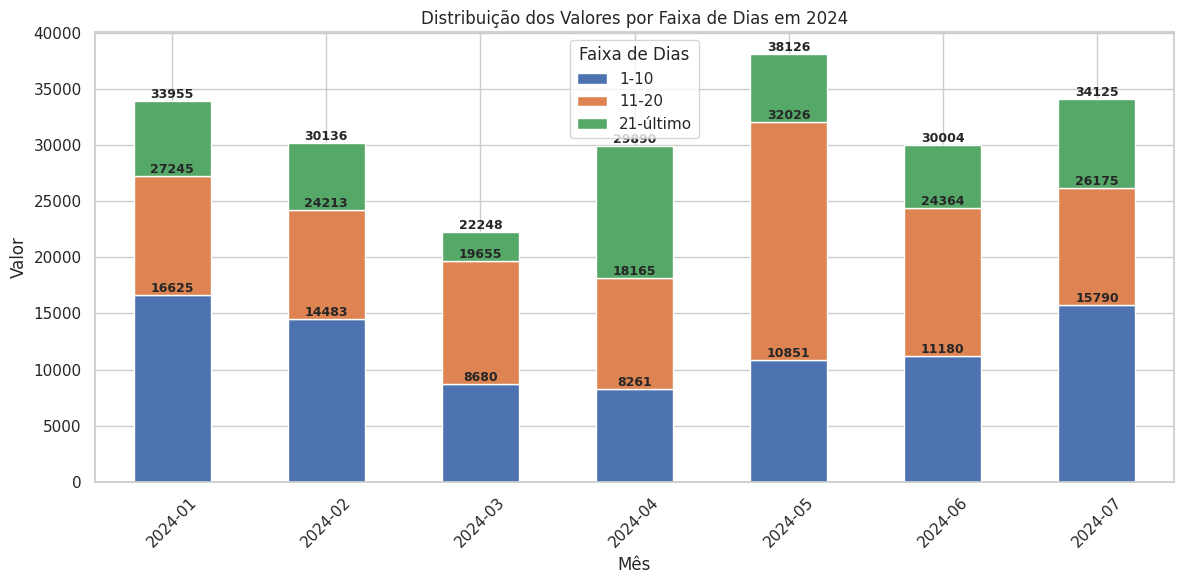

In [ ]:
df_pivot = df_2024.pivot(index='Ano_Mes', columns='Faixa_Dias', values='Valor')
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, weight='bold')
plt.title('Distribuição dos Valores por Faixa de Dias em 2024')
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(title='Faixa de Dias')
plt.tight_layout()
plt.show()


In [ ]:
dados = {
    'Descrição': [
        'Aluguel', 'Folha de Pagamento', 'Água', 'Luz', 'Gás', 'Internet',
        'Reparos e Manutenções', 'Seguro', 'Material de Escritório',
        'Investimentos de Melhoria', 'Encargos bancários', 'Software e Tecnologia',
        'Honorários Contador', 'Produto de Limpeza', 'Copos', 'Pazinha', 'Café',
        'Açúcar', 'Adoçante'
    ],
    'Dia do Mês': [
        'Dia 20', 'Dia 30', 'Dia 19', 'Dia 28', '-', 'Dia 25', 'Dia 20',
        'Dia 01', 'Dia 10', 'Dia 10', 'Dia 12', 'Dia 07', 'Dia 20',
        'Dia 20', 'Dia 20', 'Dia 20', 'Dia 20', 'Dia 20', 'Dia 20'
    ],
    'Valor': [
        1500.00, 17521.20, 120.00, 1689.00, 0.00, 119.00, 1666.66, 180.00,
        10.00, 2882.00, 0.00, 105.00, 450.00, 60.00, 120.00, 50.00, 200.00,
        50.00, 15.00
    ]
}

df = pd.DataFrame(dados)
df.to_csv('contas_a_pagar.csv', index=False)
print("Arquivo CSV criado com sucesso!")


Arquivo CSV criado com sucesso!


In [ ]:
df.head(50)

,Descrição,Dia do Mês,Valor
0,Aluguel,Dia 20,1500.00
1,Folha de Pagamento,Dia 30,17521.20
2,Água,Dia 19,120.00
3,Luz,Dia 28,1689.00
4,Gás,-,0.00
5,Internet,Dia 25,119.00
6,Reparos e Manutenções,Dia 20,1666.66
7,Seguro,Dia 01,180.00
8,Material de Escritório,Dia 10,10.00
9,Investimentos de Melhoria,Dia 10,2882.00


In [ ]:
df_contas = pd.DataFrame(df)
def map_dia_para_faixa(dia):
    if isinstance(dia, str):
        try:
            dia_num = int(dia.split()[1])
            if 1 <= dia_num <= 10:
                return '1-10'
            elif 11 <= dia_num <= 20:
                return '11-20'
            elif 21 <= dia_num <= 31:
                return '21-último'
        except (IndexError, ValueError):
            return 'Não Mapeado'
    return 'Não Mapeado'
df_contas['Faixa_Dias'] = df_contas['Dia do Mês'].apply(map_dia_para_faixa)
df_contas = df_contas[df_contas['Faixa_Dias'] != 'Não Mapeado']
print(df_contas)



                    Descrição Dia do Mês     Valor Faixa_Dias
0                     Aluguel     Dia 20   1500.00      11-20
1          Folha de Pagamento     Dia 30  17521.20  21-último
2                        Água     Dia 19    120.00      11-20
3                         Luz     Dia 28   1689.00  21-último
5                    Internet     Dia 25    119.00  21-último
6       Reparos e Manutenções     Dia 20   1666.66      11-20
7                      Seguro     Dia 01    180.00       1-10
8      Material de Escritório     Dia 10     10.00       1-10
9   Investimentos de Melhoria     Dia 10   2882.00       1-10
10         Encargos bancários     Dia 12      0.00      11-20
11      Software e Tecnologia     Dia 07    105.00       1-10
12        Honorários Contador     Dia 20    450.00      11-20
13         Produto de Limpeza     Dia 20     60.00      11-20
14                      Copos     Dia 20    120.00      11-20
15                    Pazinha     Dia 20     50.00      11-20
16      

In [ ]:
df_agrupado_contas = df_contas.groupby('Faixa_Dias')['Valor'].sum().reset_index()
df_agrupado_contas = df_agrupado_contas[['Faixa_Dias', 'Valor']]
df_agrupado_contas.head(50)



,Faixa_Dias,Valor
0,1-10,3177.00
1,11-20,4231.66
2,21-último,19329.20


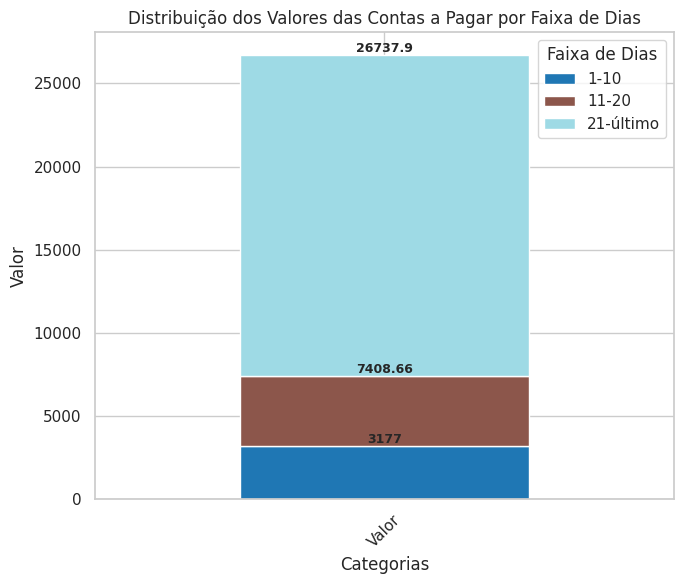

In [ ]:
df_pivot_contas = df_agrupado_contas.pivot_table(index=None, columns='Faixa_Dias', values='Valor', aggfunc='sum', fill_value=0)
ax = df_pivot_contas.plot(kind='bar', stacked=True, figsize=(7, 6), colormap='tab20')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, weight='bold')
plt.title('Distribuição dos Valores das Contas a Pagar por Faixa de Dias')
plt.xlabel('Categorias')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(title='Faixa de Dias')
plt.tight_layout()
plt.show()

In [ ]:
data = {
    'Descrição': ['Aluguel', 'Folha de Pagamento', 'Água', 'Luz', 'Internet', 'Reparos e Manutenções', 'Seguro', 'Material de Escritório', 'Investimentos de Melhoria', 'Encargos bancários', 'Software e Tecnologia', 'Honorários Contador', 'Produto de Limpeza', 'Copos', 'Pazinha', 'Café', 'Açúcar', 'Adoçante'],
    'Dia do Mês': ['Dia 20', 'Dia 30', 'Dia 19', 'Dia 28', 'Dia 25', 'Dia 20', 'Dia 01', 'Dia 10', 'Dia 10', 'Dia 12', 'Dia 07', 'Dia 20', 'Dia 20', 'Dia 20', 'Dia 20', 'Dia 20', 'Dia 20', 'Dia 20'],
    'Valor': [1500.00, 17521.20, 120.00, 1689.00, 119.00, 1666.66, 180.00, 10.00, 2882.00, 0.00, 105.00, 450.00, 60.00, 120.00, 50.00, 200.00, 50.00, 15.00]
}

df_contas = pd.DataFrame(data)
def map_dia_para_faixa(dia):
    try:
        dia_num = int(dia.split()[1])
        if 1 <= dia_num <= 10:
            return '1-10'
        elif 11 <= dia_num <= 20:
            return '11-20'
        elif 21 <= dia_num <= 31:
            return '21-último'
    except ValueError:
        return 'Não Mapeado'
df_contas['Faixa_Dias'] = df_contas['Dia do Mês'].apply(map_dia_para_faixa)
df_contas = df_contas[df_contas['Faixa_Dias'] != 'Não Mapeado']
df_final = df_contas[['Descrição', 'Faixa_Dias', 'Valor']].copy()
faixa_order = ['1-10', '11-20', '21-último']
df_final['Faixa_Dias'] = pd.Categorical(df_final['Faixa_Dias'], categories=faixa_order, ordered=True)
df_final = df_final.sort_values(by='Faixa_Dias').reset_index(drop=True)

df_final.head(50)



,Descrição,Faixa_Dias,Valor
0,Investimentos de Melhoria,1-10,2882.00
1,Seguro,1-10,180.00
2,Material de Escritório,1-10,10.00
3,Software e Tecnologia,1-10,105.00
4,Café,11-20,200.00
5,Pazinha,11-20,50.00
6,Copos,11-20,120.00
7,Produto de Limpeza,11-20,60.00
8,Honorários Contador,11-20,450.00
9,Aluguel,11-20,1500.00


# Conclusão



A análise revelou que:
* Embora as receitas frequentemente superem os custos, há meses em que os custos são maiores do que as receitas.

Para lidar com essa variabilidade, decidimos utilizar a sobra de caixa como uma **reserva de emergência**. Esta reserva será acumulada ao longo do tempo e usada para registrar lucro líquido ao final de cada exercício.

Além disso, **introduzimos um pro labore para o sócio**, que anteriormente não recebia salário.

* Organizamos o fluxo de caixa separando os recebimentos e pagamentos por faixa de datas. As médias de recebimentos e pagamentos foram calculadas para cada faixa, e qualquer sobra no final do mês será destinada à reserva de emergência.

**Com essas mudanças, buscamos melhorar significativamente a gestão financeira da academia no curto e médio prazo.**

A reserva de emergência permitirá um planejamento financeiro mais robusto, possibilitando investimentos e melhorias contínuas.

Isso visa não apenas aumentar a capacidade de atender mais alunos, mas também oferecer maior conforto e qualidade aos alunos existentes, promovendo a sustentabilidade e o crescimento da academia.